<a href="https://colab.research.google.com/github/SandyLlapa/ML-ensemble/blob/main/Sandy_Llapa_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7

## Introduction

**What is the goal of this lab?**

The goal of this lab is to get hands on experience evaluating ensemble ML techniques.

**Context**

Ensemble machine learning techniques combine multiple models to enhance prediction accuracy and reliability. Methods like bagging, boosting, and stacking work by aggregating the strengths of various models, reducing errors and improving generalization. These techniques are particularly useful when a single model might underperform, as the ensemble can make better, more balanced predictions by combining the outputs of different models.



### Data

This lab uses the Optical Recognition of Handwritten Digits data set 🔢. Each row represents an image of a hand written digit 0-9, each column is a pixel in the image. The values in the table represent the intensity of that pixel. This data set is used to classify the digit in each image for [optical character recognition](https://en.wikipedia.org/wiki/Optical_character_recognition).

In [ ]:
# Install package to download data sets from UCI ML Repo
!pip3 install -U ucimlrepo --quiet
from ucimlrepo import fetch_ucirepo

In [ ]:
# Get the data set
digits = fetch_ucirepo(name="Optical Recognition of Handwritten Digits")

In [ ]:
# Get raw data in a pandas.DataFrame format
digits_df = digits.data.original

In [ ]:
# Citation
print("Citation:\n", digits.metadata.additional_info.citation)

Citation:
 None


> _Alpaydin, E. and Kaynak, C. (1998). Optical Recognition of Handwritten
Digits._      
> _UCI Machine Learning Repository. https://doi.org/10.24432/C50P49._


In [ ]:
# More information
print("Check out this data set on the UCI ML Repository for more information:")
print(digits.metadata.repository_url)

Check out this data set on the UCI ML Repository for more information:
https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits


## Problem Statement

**Describe a use case or application that could utilize optical character recognition to classify hand written digits.**

>
Optical character recognition is commonly used in bank check processing. It is important that the numbers written on a check are read correctly; therefore, ensemble learning models are often used to reduce the likelihood of human error in this process.

**Describe the differences between bagging and boosting.**

>
Bagging reduces variance by training multiple models independently and in parallel, whereas boosting reduces bias by training models sequentially, with each model depending on the previous one.


**Describe the similarities and differences between Adaboost and gradient boosting.**

>
AdaBoost and Gradient Boosting are boosting algorithms that improve the accuracy of a model by combining predictions from multiple weak learners. In AdaBoost, the weights of the samples are adjusted at each iteration, whereas in Gradient Boosting, there is no reweighting of the samples. In AdaBoost, the final model is formed by combining the predictions from all individual trees through a weighted sum, while in Gradient Boosting, the final model is an equal-weighted sum of all the individual trees.

## Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Inspection

Print out the following details about the data:
- The first 5 rows of the data set
- Number of rows and columns
- Data type of each column
- Number of null values (or not-null values) in each column
- General statistics of each numeric column (min, max, mean, standard deviation)

---

**Hints**

- [`pandas.DataFrame.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)
- [`pandas.DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
- [`pandas.DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [ ]:


fiverows = digits_df.head()

rowscols = digits_df.shape

datatype = digits_df.dtypes

nullvalues = digits_df.isnull().sum()

stats = digits_df.describe()

print(f"First five rows:\n {fiverows}\n")
print(f"Number of rows and columns:\n {rowscols}\n")
print(f"Data type:\n {datatype}\n")
print(f"Number of null values:\n {nullvalues}\n")
print(f"General stats:\n {stats}\n")


First five rows:
    Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           0           1           6          15          12           1   
1           0           0          10          16           6           0   
2           0           0           8          15          16          13   
3           0           0           0           3          11          16   
4           0           0           5          14           4           0   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute56  \
0           0           0           0            7  ...            0   
1           0           0           0            7  ...            0   
2           0           0           0            1  ...            0   
3           0           0           0            0  ...            0   
4           0           0           0            0  ...            0   

   Attribute57  Attribute58  Attribute59  Attribute60  Attribute61  \
0            0  

### Data cleaning

No data cleaning for this lab. The data set is already clean 😀.

### Data Visualization and Statistics

Count the number of instances of each digit. This is the `"class"` column of the data frame.

---
**Hints**

- [`pandas.Series.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)
- [`pandas.Series.sort_index()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_index.html)

In [ ]:

digitInstances = digits_df['class'].value_counts().sort_index()
print(digitInstances)

class
0    554
1    571
2    557
3    572
4    568
5    558
6    558
7    566
8    554
9    562
Name: count, dtype: int64


Visualize the "average" of each digit.
- Group by the the `"class"` columns
- Take the `.mean()` of every other column for each class.
- The resulting data frame should have 10 rows, 1 for each digit.
- For each row, `.reshape()` the values to be an 8 x 8 grid.
- Use `matplotlib.pyplot.imshow(cmap='gray')` to print out the image of the "average" of each digit in black and white.


---
**Hints**

*Getting the pixel averages*
- [`pandas.DataFrame.groupby()`]()
- [`pandas.DataFrame.mean()`]()

*Reshaping a row into an image*
- [`pandas.Series.drop()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.drop.html) to remove the class value
- [`pandas.Series.values`](https://pandas.pydata.org/docs/reference/api/pandas.Series.values.html) to convert to a numpy array
- [`numpy.ndarray.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html) to reshape the array into an 8x8 matrix

*Plotting the image pixel values*
- [`matplotlib.pyplot.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

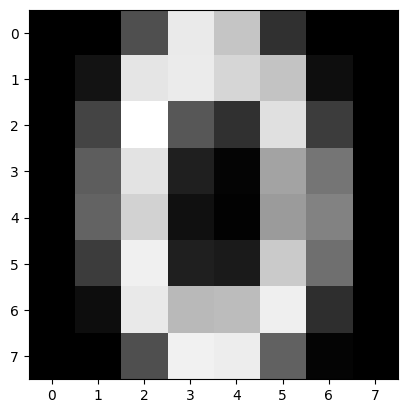

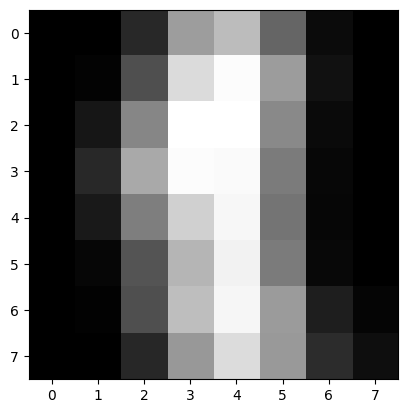

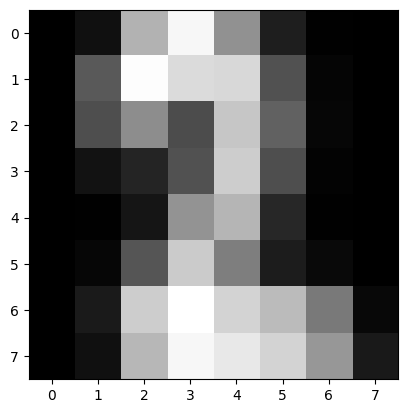

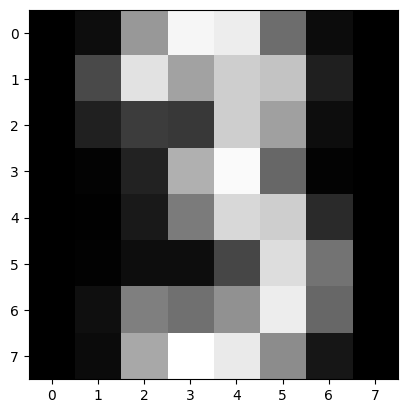

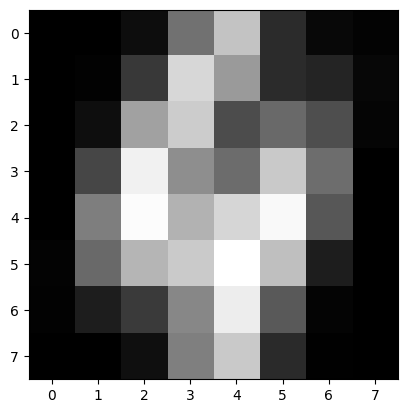

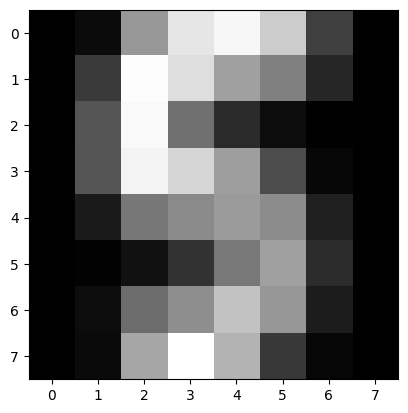

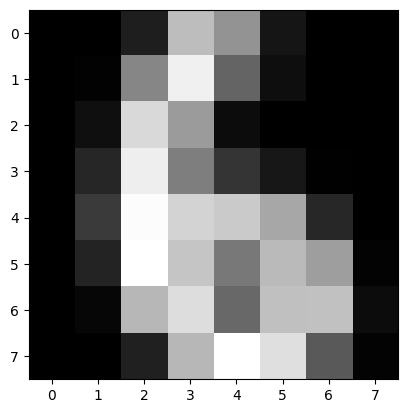

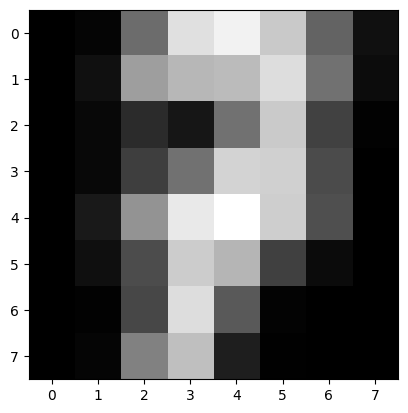

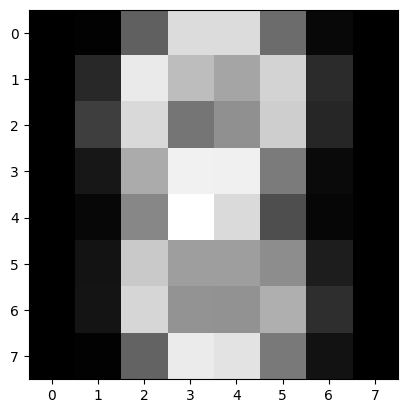

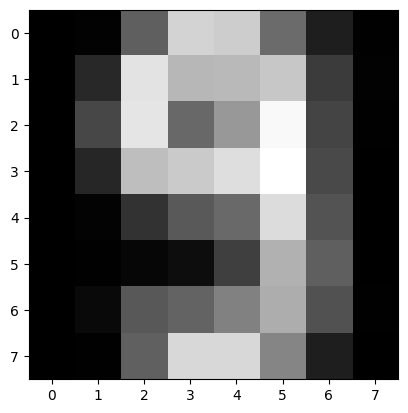

In [ ]:
# Answer with code here

average = digits_df.groupby('class').mean()

for i in range(10):
  image = average.loc[i].values.reshape(8,8)

  plt.imshow(image, cmap='gray')
  plt.show()


Run a principle component analysis with 5 components on the data set. Visualize the scatter plots and distributions of the 5 components with a Seaborn pairplot with each class as a different color (`hue='class'`).

---
**Hints**

- [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [`seaborn.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)


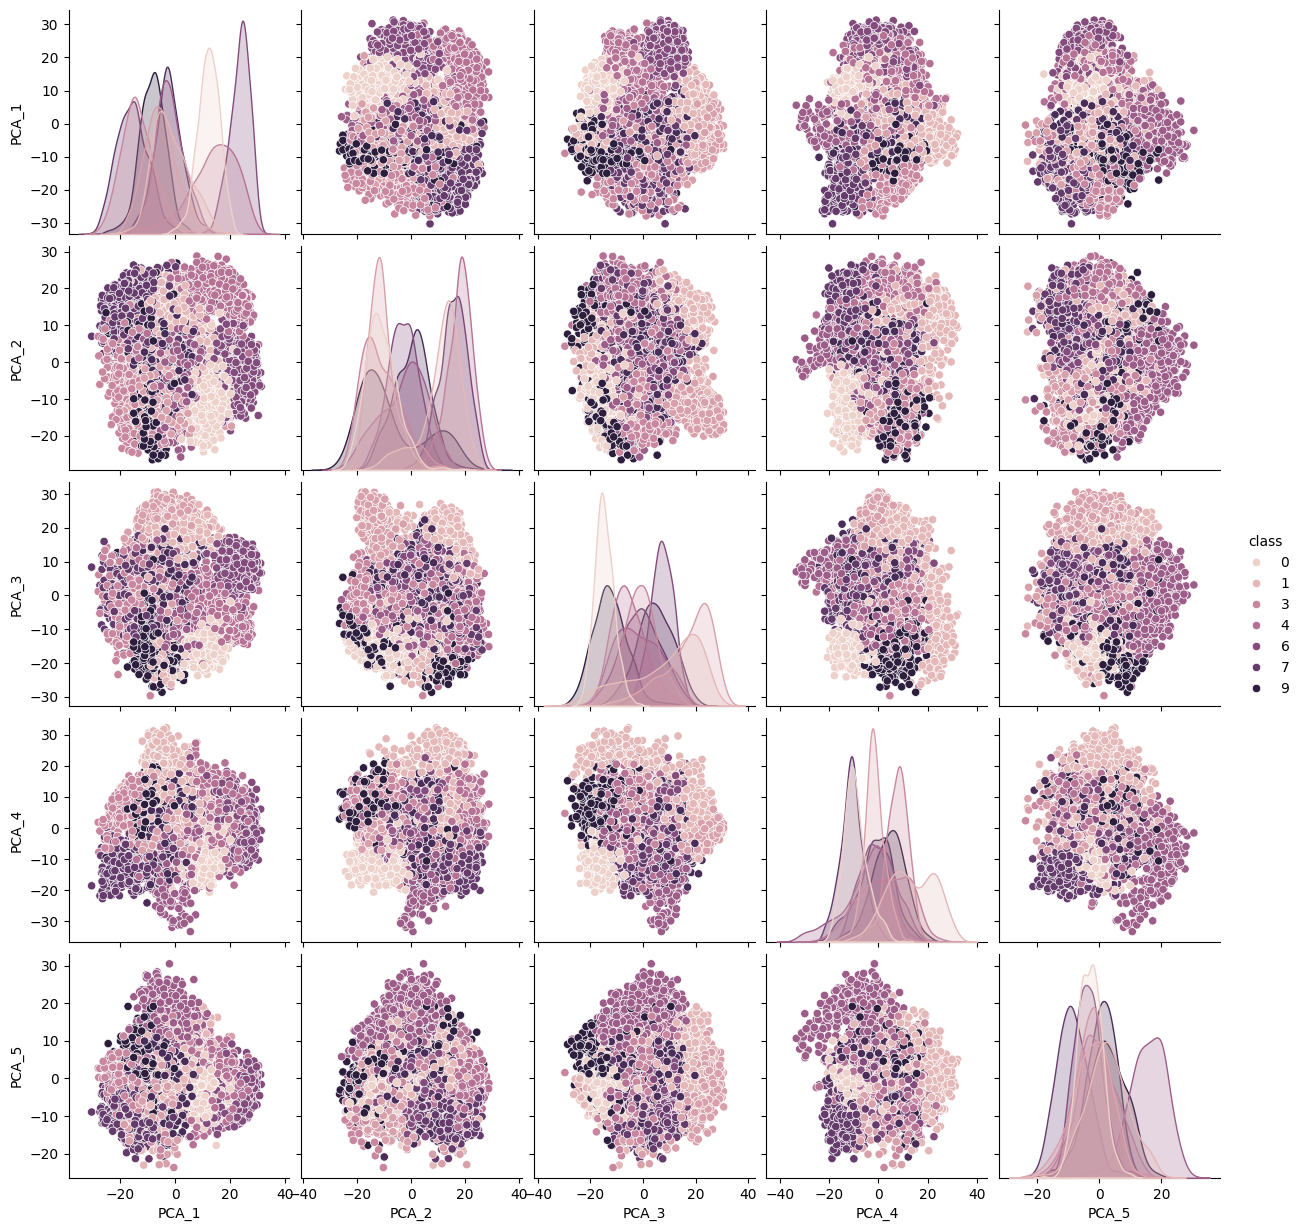

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
x = digits_df.drop('class', axis=1)
y = digits_df['class']

pca = PCA(n_components=5)
result = pca.fit_transform(x)

pca_df = pd.DataFrame(data=result,columns=[f'PCA_{i}' for i in range(1,6)])
pca_df['class'] = y.values

sns.pairplot(pca_df,hue='class')
plt.show()


## Models

Split the rows of the data set into 2 groups: 80% training -  & 20% testing.

Also separate the feature variables (X) from the target variable (y).

You should have 4 different objects with the data set: `X_train`, `X_test`, `y_train`, `y_test`.

---
**Hints**

- [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.2, random_state=4061)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((4496, 64), (1124, 64), (4496,), (1124,))

Perform PCA on the *features* in the *training data set*. Save the top 5 components into a new DataFrame.

---
**Hints**
- [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [ ]:
# Answer with code here
pca = PCA(n_components=5)
x_training=pca.fit_transform(X_train)
pca_train = pd.DataFrame(data=x_training, columns=[f'PC{i}' for i in range(1, 6)])



K-fold cross validate (5-folds) 3 different ML Classification algorithms: K-nearest neigbors, support vector machines, and a decision tree. Use the 5 components from the PCA analysis as features to predict the number (`"class"`) of each hand written digit. Print out the average accuracy of all the folds for each algorithm.

---
**Hints**
- [`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [`sklearn.model_selection.cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)








In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()

classifiers = {
    'KNN': knn,
    'SVM': svm,
    'DECISION TREE': dt
}

for x,y in classifiers.items():
  scores = cross_val_score(y, x_training,y_train,cv=5)

  print(f"{x} average accuracy: {np.mean(scores):.4f}")


KNN average accuracy: 0.9257
SVM average accuracy: 0.9266
DECISION TREE average accuracy: 0.8570


Repeat the same question, but instead of cross validating a single model from each algorithm, create a *bagging ensemble of 50 models* trained from each algothim and compare the average 5-fold cross validation accuracy of each ensemble of models for each algorithm.

---
**Hints**

- [`sklearn.ensemble.BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

In [ ]:
from sklearn.ensemble import BaggingClassifier
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()

bagging_knn = BaggingClassifier(estimator=knn, n_estimators=50, random_state=4061)
bagging_svm = BaggingClassifier(estimator=svm, n_estimators=50, random_state=4061)
bagging_dt = BaggingClassifier(estimator=dt, n_estimators=50, random_state=4061)

bagging_classifiers = {
    'Bagging KNN': bagging_knn,
    'Bagging SVM': bagging_svm,
    'Bagging DECISION TREE': bagging_dt
}


for x,y in bagging_classifiers.items():
  scores = cross_val_score(y, x_training,y_train,cv=5)

  print(f"{x} SCORE: {np.mean(scores):.4f}\n")




Bagging KNN SCORE: 0.9286

Bagging SVM SCORE: 0.9262

Bagging DECISION TREE SCORE: 0.9110



Train a gradient boosted trees classifer to do the same tasks with the same features. Print out the average accuracy of a 5-fold cross validation.

---
**Hints**
- [`sklearn.ensemble.GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier(random_state=4061)
scores = cross_val_score(gbt, x_training,y_train,cv=5)
print(f"GBT average accuracy: {np.mean(scores):.4f}")


GBT average accuracy: 0.9066


Create stacked ensemble of: K-nearest neighbors, support vector machine, and gradient boosted trees using the same input data. Perform 5-fold cross validation on the stacked ensemble of models and print out the average accuracy.

---
**Hints**

- [`sklearn.ensemble.StackingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)

In [ ]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
svm = SVC(probability=True)
gbt = GradientBoostingClassifier()

stacked_model = StackingClassifier(
    estimators=[
        ('knn', knn),
        ('svm', svm),
        ('gbt', gbt)
    ],
    final_estimator=GradientBoostingClassifier(),
    cv=5
)

#takes a long time to execute cross_val_score
scores = cross_val_score(stacked_model, x_training, y_train, cv=5)
print(f"Stacked Ensemble average accuracy: {np.mean(scores):.4f}")



Stacked Ensemble average accuracy: 0.9210


## Conclusion

**Which of the three algorithms was improved by baggging? For any that were not improved by bagging, why do you think that could be?**

>
The Decision Tree was the algorithm that improved the most with bagging. Before bagging, it had an average score of 0.8608, and after bagging, it improved to 0.911. KNN also improved, but not as much. Before bagging, the average score of KNN was 0.9257, and after it was 0.9286. The only algorithm that did not improve was SVM. Before bagging, the average score of SVM was 0.9266, and after bagging, it slightly decreased to 0.9262. SVM did not improve with bagging because it is a low-variance, high-bias model, and bagging primarily reduces variance, not bias.

**Did stacking improve the performance to be better than the original models? In what cases would you expect stacking to work well?**

>

The performance of the original models was not improved by stacking. Stacking works best when the models are diverse and capture different aspects of the data.